In [ ]:
import os
import torch
import numpy as np

def load_and_bind_features(directory_path):
    """
    Load all .pt files in the given directory and bind them into a single NumPy array.

    Args:
        directory_path (str): Path to the directory containing .pt files.

    Returns:
        np.ndarray: Combined feature matrix of shape (num_samples, num_features).
    """
    all_features = []
    
    for filename in os.listdir(directory_path):
        if filename.endswith(".pt"):
            file_path = os.path.join(directory_path, filename)
            features = torch.load(file_path)  # Load the .pt file
            if isinstance(features, torch.Tensor):
                features = features.numpy()  # Convert to NumPy array
            elif isinstance(features, list):  # Handle list of tensors if applicable
                features = np.vstack([f.numpy() if isinstance(f, torch.Tensor) else f for f in features])
            # cut down to 200 frames if more
            if features.shape[0] > 200:
                features = features[:200]
            all_features.append(features)

    # Combine all feature arrays into a single matrix
    combined_features = np.vstack(all_features)
    return combined_features

# Example usage
directory_path = "data//features_directory"
combined_features = load_and_bind_features(directory_path)

print(f"Combined features shape: {combined_features.shape}")


In [3]:
import os

# Check the current working directory
os.chdir('..')
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: /home/henry/robo/cis5810/final/cis5810_final_gait_classifier


In [10]:
import pandas as pd
import torch
import os

directory_path = "data/gavd_dataset/landmarks"

stats = []
normalized_stats = []

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        seq = filename.split("_")[0]
        file_path = os.path.join(directory_path, filename)
        features_df = pd.read_csv(file_path, header = None)
        features_df = features_df.sort_values(by=1, key=lambda col: col.astype(float))
        features_df = features_df.iloc[:, 35:]
        features = torch.tensor(features_df.values.astype(float), dtype=torch.float32)
        # print the max, min, mean, std of the features
        stats.append([seq, features.max(), features.min(), features.mean(), features.std()])
        # normalize the features
        normalized_features = (features - features.mean()) / features.std()
        normalized_stats.append([seq, normalized_features.max(), normalized_features.min(), normalized_features.mean(), normalized_features.std()])
print(len(stats))

1826


(array([  1.,   0.,   1.,   1.,   1.,   1.,   3.,   3.,   3.,   5.,   7.,
          8.,  12.,  26.,  63., 107., 174., 272., 231., 128.,  68.,  63.,
         31.,  12.,   3.,   3.,   0.,   1.,   0.,   1.]),
 array([0.11105007, 0.12416311, 0.13727614, 0.15038918, 0.16350221,
        0.17661525, 0.18972828, 0.20284132, 0.21595436, 0.22906739,
        0.24218043, 0.25529346, 0.2684065 , 0.28151953, 0.29463257,
        0.30774561, 0.32085864, 0.33397168, 0.34708471, 0.36019775,
        0.37331078, 0.38642382, 0.39953686, 0.41264989, 0.42576293,
        0.43887596, 0.451989  , 0.46510203, 0.47821507, 0.49132811,
        0.50444114]),
 <BarContainer object of 30 artists>)

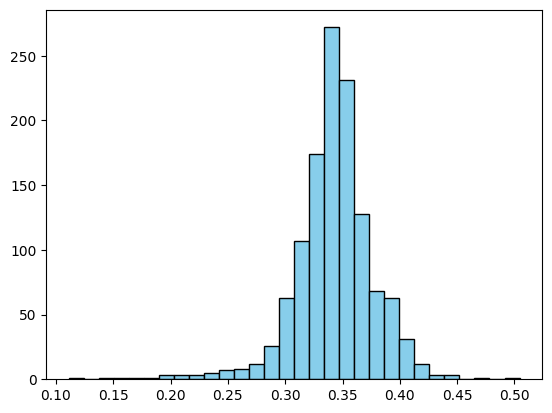

In [14]:
# Create a histogram of the mean values
import matplotlib.pyplot as plt

# Extract the mean values from the stats list
mean_values = [stat[3].item() for stat in stats]

# Create a histogram
plt.hist(mean_values, bins=30, color='skyblue', edgecolor='black')